In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [150]:
files = [
'resistors/retention_10k/10/2025-07-22 14-07-12_+retention.csv',
'resistors/retention_10k/100/2025-07-22 14-11-35_+retention.csv',
'resistors/retention_10k/10000/2025-07-22 14-17-16_+retention.csv',
'resistors/retention_10k/100000/2025-07-22 14-18-30_+retention.csv'
]

In [151]:
print('Показания АЦП')
all_data = []
for i,fpath in enumerate(files):    
    df = pd.read_csv(fpath, delimiter=';')
    all_data.append(df.adc.to_numpy())
    print(f'Mean: {int(all_data[i].mean())}, std: {int(all_data[i].std())}')

Показания АЦП
Mean: 10847, std: 1
Mean: 10532, std: 2
Mean: 2505, std: 17
Mean: 288, std: 19


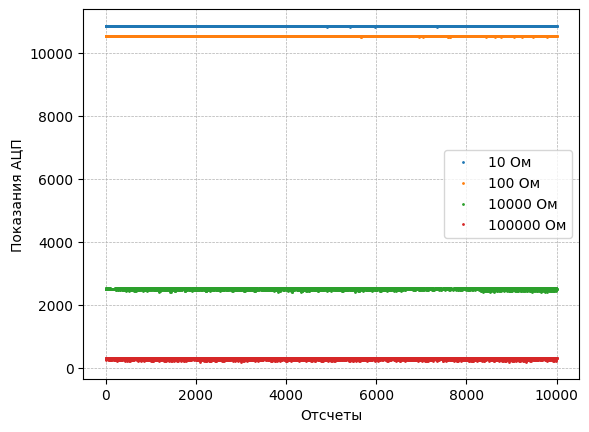

In [152]:
plt.plot(np.array(all_data).T, 'o', markersize=1)
plt.xlabel('Отсчеты')
plt.ylabel('Показания АЦП')
plt.legend(['10 Ом', '100 Ом', '10000 Ом', '100000 Ом'])
plt.grid(True, linestyle='--', linewidth=0.5)

In [153]:
print('Пересчет в сопротивления')
all_data = []
for i,fpath in enumerate(files):
    df = pd.read_csv(fpath, delimiter=';')
    df.res = df.res.apply(lambda x: float(x.replace(',','.')))
    all_data.append(df['res'].to_numpy())
    print(f'Mean: {round(all_data[i].mean(), 4)}, std: {round(all_data[i].std(),4)}')

Пересчет в сопротивления
Mean: 11.961, std: 0.472
Mean: 102.0877, std: 0.7587
Mean: 10072.4451, std: 91.1362
Mean: 111387.4062, std: 8687.8592


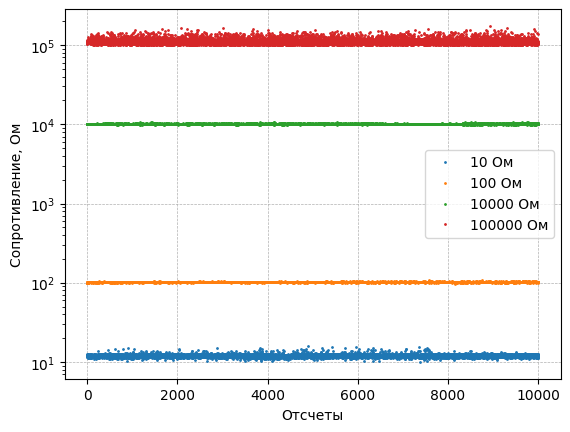

In [154]:
plt.semilogy(np.array(all_data).T, 'o' ,markersize=1)
plt.xlabel('Отсчеты')
plt.ylabel('Сопротивление, Ом')
plt.legend(['10 Ом', '100 Ом', '10000 Ом', '100000 Ом'])
plt.grid(True, linestyle='--', linewidth=0.5)